In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
print("Cell Executed")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Cell Executed


In [2]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.regularizers import l2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.callbacks import ModelCheckpoint
from random import shuffle
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))
# print("Cell Executed")

Using TensorFlow backend.


In [3]:
batch_size = 1
num_classes = 5
epochs = 20
IMAGE_SIZE = 224
# DATA_SAVE_DIR = "/home/cudacenter/DR/ALEXNET/CLAHE_TRAIN/"
print("Cell Executed")

Cell Executed


In [5]:
finalData = np.load("gdrive/My Drive/final224x224.npy")

shuffle(finalData)

train = finalData[:-500]
test = finalData[-500:]


# #MAKING DATA READY!!!
X_train = np.array([i[0] for i in train]).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 3)
Y_train = np.array([i[1] for i in train])

X_test = np.array([i[0] for i in test]).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 3)
Y_test = np.array([i[1] for i in test])

# np.save("/home/cudacenter/DR/ALEXNET/CLAHE_TRAIN/train_clahe.npy",train)
# np.save("/home/cudacenter/DR/ALEXNET/CLAHE_TRAIN/test_clahe.npy",test)

del finalData
del train
del test

print("Data Loaded")

unique_elements, counts_elements = np.unique(Y_train, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
print("Cell Executed")

Data Loaded
Frequency of unique values of the said array:
[[  0   1   2   3   4]
 [933 873 897 870 927]]
Cell Executed


[3]


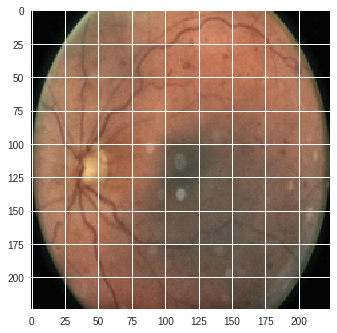

In [6]:
img = X_train[10]
print(Y_train[10])
imgplot = plt.imshow(img)

In [7]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train,num_classes)
Y_test = keras.utils.to_categorical(Y_test,num_classes)
print("Cell Executed")

Cell Executed


In [8]:
#layering the layers(Sequential)
model = Sequential()
#first conv2D layer 32*3*3
model.add( Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape = (IMAGE_SIZE, IMAGE_SIZE,3)) )
#second conv2D layer 64*3*3
model.add( Conv2D(64, kernel_size=(3, 3), activation='relu') )
#MaxPooling layer 2*2
model.add( MaxPooling2D(pool_size=(2, 2)) )
#regularization
model.add( Dropout(0.25) )
#flattening the output layer(Pooled) for getting input layer(2D matrix)
model.add( Flatten() )
#first hidden layer x128 neurons
model.add( Dense(128, activation='relu') )
#regularization
model.add( Dropout(0.25) )
#output layer x10 neurons
model.add( Dense(num_classes, activation='softmax') )
#display layers
model.summary()
print("Cell Executed")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 774400)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               99123328  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [9]:
# checkpoint = ModelCheckpoint('/home/cudacenter/DR/ALEXNET/CLAHE_TRAIN/model-{epoch:03d}-224x224Alex.h5',verbose = 1,monitor = 'val_acc',save_best_only = True,mode = "auto")
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
print("Cell Executed")

Cell Executed


In [0]:
model.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))

Train on 4500 samples, validate on 500 samples
Epoch 1/20
4500/4500 [==============================] - 602s 134ms/step - loss: 12.7766 - acc: 0.2073 - val_loss: 12.5399 - val_acc: 0.2220
Epoch 2/20
4500/4500 [==============================] - 596s 133ms/step - loss: 12.7763 - acc: 0.2073 - val_loss: 12.5399 - val_acc: 0.2220
Epoch 3/20
4500/4500 [==============================] - 596s 132ms/step - loss: 12.7763 - acc: 0.2073 - val_loss: 12.5399 - val_acc: 0.2220
Epoch 4/20
4500/4500 [==============================] - 595s 132ms/step - loss: 12.7763 - acc: 0.2073 - val_loss: 12.5399 - val_acc: 0.2220
Epoch 5/20
 148/4500 [..............................] - ETA: 9:29 - loss: 13.7222 - acc: 0.1486